# ANÁLISE DE PORTFÓLIO - PARTE 1.
# Um estudo de caso usando séries temporais com Python

#### Rio de Janeiro, 30/08/2018
[Antonio Roberto Mendes Barberá](https://rbarbera2.wixsite.com/backlog/)

# Objetivo

O objetivo deste artigo (notebook) é o de, apenas, compartilhar conhecimentos a respeito de algumas das habilidades necessárias à análise das Séries Temporais (TS), tema extremamente carente de exemplos de aplicação prática, sobretudo em Língua Portuguesa, no que diz respeito ao seu estudo e modelagem.

A modelagem de séries temporais é tema de extrema relevância para o estudo e eo entendimento do comportamento de variáveis no tempo. Pode ser associada a conhecimentos e procedimentos usados em inteligência artificial, especialmente os de **deep learning** (futura versão) e torna-se ainda mais carente de profissionais de ciência de dados que dominem ambas as técnicas, de modo a poderem utilizar o estado da arte da tecnologia, para a interpretação e modelagem da melhor relação risco/retorno dos portfólios diversificados.

## Conceitos básicos utilizados

- **Série Temporal**<br>
Uma série temporal pode ser considerada como um conjunto de dados observados e ordenados segundo algum parâmetro de tempo, 
onde os dados devem apresentar alguma dependência serial entre eles, quandos tomados a intervalos de tempo equidistantes (horários, diário, semanal, mensal,trimestral, anual, etc.).

As séries temporais são classificadas, segundo sua variabilidade, como **estacionárias** e **ergódigas** (ou não estacionárias).

- **Séries Temporais Estacionárias**<br>
São aquelas cujos valores observados variam em torno de um determinado valor médio. Suas estatísticas não são afetadas por variações no tempo.

- **Série Temporais não Estacionárias, ou Ergódigas**<br>
São aquelas que os valores observados variam apresentando alguma tendência, seja ela de crescimento ou descrescimento, em torno, ou não, de um valor médio. A maioria das séries do mundo real é de natureza não estacionária.

As séries temporais podem ser, ainda, classificadas como discretas, contínuas, determinísticas, estocásticas, multivariadas e multidimensionais. 

Segundo Mendenhall (Mendenhall, 1993) as séries temporais podem ser representadas como a combinação de quatro componentes "não observáveis", a seguir:

- componente de tendência;
- componente cíclico;
- componente sazonal; e
- componente de erro.

## Média, mediana e médias móveis.

### Dúvidas comuns entre os conceitos de média e mediana.

Média e mediana são medidas estatísticas que possuem papel semelhante, no que se refere à compreensão da tendência do valor central de um conjunto de medidas que realizamos. Embora a média tenha se popularizado como o ponto médio em uma amostra destas medidas, ela possui a desvantagem de ser muito afetada por um valor único, seja ele muito alto, ou muito baixo, se comparado ao restante das medidas que tomamos. É por isto que a mediana é, em determinados casos, considerada a melhor medida do ponto médio de uma série de observações.

- Mediana.

Grosseiramente falando, a mediana é descrita como o valor numérico que separa a metade superior, de um conjunto de medidas, da sua metade inferior. Elas precisam estar ordenadas crescente, ou decrescentemente. O valor da mediana será sempre igual, para ambas as ordenações. A mediana pode ser calculada  em relação a uma amostra de medidas, ou para uma população inteira de medidas. Uma mediana pode ser calculada listando-se os números (ou medidas) em ordem crescente e, em seguida, localizando-se o número central desta série de números. Se houver dois números iguais, a mediana passa a ser a média aritmética destes dois números.

- Media.

Média, em geral, é referida como a média aritmética de um conjunto de medidas (amostra de medidas), ou distribuição de medidas (ou, ainda, população de medidas). É calculada somando-se todos os valores e dividindo a quantidade obtida pelo número de valores.

**Obs 1**.: quando a distribuição das medidas é normal, usamos a média. Quando a distribuição é não normal (enviesada), usamos a mediana. Há outros tipos de médias, definidas na matemática, mas que são pouco usadas em estatística.

- Media Movel Simples (de preços, por exemplo):

A média móvel simples é formada por meio do cálculo do preço médio de um ativo, ao longo de um determinado número de períodos no tempo. Por exemplo, a média móvel simples de 21 dias (de preços de uma ação da Bovespa, apenas para exemplificar), seria a soma de 21 dias de preços de fechamento, tomados a partir da data de hoje, dividida por vinte e um. O próximo ponto da média móvel de 21 dias, seria a soma dos próximos 21 dias de preços, dividida por vinte e um e assim sucessivamente, à medida que os dias fossem passando. 

Se fosse calculada a partir valores passados, fixa-se uma data de início e toma-se os valores a partir dela, de 21 em 21 dias e calcula-se as respectivas médias, dia após dia, até a date de hoje.

**Obs 2**.: uma outra média móvel frequentemente usada é a exponencial, cuja definição foge ao escopo deste estudo.

## Formas alternativas para a observação e modelagem de séries temporais
1. Modelos ARIMA [AutoRegressive Integrated Moving Averages](https://rae.fgv.br/rae/vol29-num2-1989/modelos-arima-abordagem-box-jenkins-aplicacao-na-previsao-ibovespa-curtissimo-pr).
2. Modelos GARCH [Generalized AutoRegressive Conditional Heteroskedasticity](http://www.diva-portal.org/smash/get/diva2:576215/FULLTEXT02).
3. Modelos VAR/Cointegração [Vectors AutoRegressive/CoIntegration](http://www.eeb.sei.ba.gov.br/pdf/2014/fd/analise_de_cointegracao.pdf)
4. [Redes Neurais](https://www.sciencedirect.com/science/article/pii/S2212567115016743) aplicadas a séries temporais.
5. [Lógica Fuzzi](http://homepages.dcc.ufmg.br/~gfrancis/kdmile/papers/wip/STF_v1.pdf) em séries temporais
6. KNN [K-nearest neighbor](http://www.teses.usp.br/teses/disponiveis/55/55134/tde-21112016-150659/pt-br.php) em séries temporais.
7. SVM [Support Vector Machines](https://www.marinha.mil.br/spolm/sites/www.marinha.mil.br.spolm/files/102161.pdf) em séries temporais e outros...

# Parte 1. Montando e analisando a série temporal de um portfólio
Em face da crônica escassez de dados históricos públicos brasileiros de preços de produtos, optamos por montar um portfolio composto, exclusivamente, de ações. Foram selecionadas quinze boas empresas da B3/Bovespa, que têm apresentado bons fundamentos, contendo dados históricos de preços (fechamento ajustados) desde o início da participação destas empresas na BOVESPA. 

Há, no portfolio criado, empresas que ingressaram no mercado há pouco menos de cinco anos. Por esta razão, foi considerado para a referida análise, apenas o período de 01/01/2013 a 30/08/2018, intervalo em que todas as empresas apresentavam informações de preços ajustados. 

Foram utilizados os modelos ARMA e GARCH, na tentativa de explicação do comportamento das séries.

**Sugiro que leia a PARTE 2. deste artigo, que está sendo publicada em separado e ilustrará o uso do Método da Fronteira Eficiente para gestão de portfólios**, enunciado por [Harry Max Markowitz] (https://pt.wikipedia.org/wiki/Harry_Max_Markowitz). 

Markowitz foi o primeiro a constatar, via modelos matemáticos, que o risco individual de um ativo (aqui entendido como o desvio padrão dos retornos históricos) na realidade, não é a variável mais relevante. Cada investimento possui determinado risco e retorno esperados. Portanto, considera-se que o retorno a ser obtido num investimento seja igual ao respectivo valor esperado dos retornos obtidos ao longo de determinado intervalo de tempo, ponderado por sua participação dentro do portfolio. Entendemos aqui, como portfolio, qualquer conjunto de ativos agrupados, cujo valor é observado ao longo do tempo, segundo intervalos regulares. 

Sendo assim, ao adicionarmos vários ativos componentes de um portfólio, o risco e retorno esperados, ao atuarem em conjunto, podem mostrar mais eficiência, do que a análise de cada investimento isolado, pelo efeito da correlação entre eles. 
Consideramos, portanto, que o risco de um portfólio será função da correlação **$\rho$** entre todos os ativos componentes. Sua variação terá comportamento não-linear e, por consequência, o retorno do portfólio será uma combinação proporcional dos retornos dos ativos que o constituem.

Desta forma, as correlações observadas entre os ativos componentes, se forem pequenas, ou até mesmo inversas, tendem a proteger o portfólio de grandes oscilações, sobretudo em momentos de stress.

## Descrição dos pré-requisitos, criação e abertura do arquivo de portfolio

Foram usados preços ajustados, com periodicidade diária (Daily Adjusted) obtidos a partir da API (Application Program Interface) fornecida pelo serviço internacional gratuito - AlphaVantage. Outras periodicidades encontram-se disponíveis, via a mesma API, podendo ser utilizado o mesmo conjunto de bibliotecas para Python.

Não tivemos a preocupação de aferir a consistência dos dados fornecidos. Fisemoas, apenas, o tratamento das eventuais ausências de dados e separamos as eventuais anomalias notórias ("outliers"). O propósito deste artigo é educacional e a intenção foi, tão somente, a de ilustrarmos o tema por meio da aplicação prática de algumas das mais consagradas técnicas de análise de portfólios, mostrando, igualmente, como apenas alguns comandos Python, tornam possível a obtenção de um olhar aprofundado e, ao mesmo tempo de rápida e barata obtenção de resultados, mesmo quando são utilizados modelos teóricos de razoável complexidade.

O portfolio aqui montado e estudado consiste numa carteira de ações ordinárias nominais (ON), composta de empresas brasileiras que no momento do estudo apresentavam bons fundamentos. Entretanto, como já foi mencionado, **poderíamos estar analisando qualquer outro portfolio de ativos, que possuísse, pelo menos, 50 pontos com dados observáveis, no tempo**.

Ao grupo de ações selecionadas foram incluídas as da VALE e da PETROBRAS, pela importância econômica destas empresas no mercado de capitais brasileiro, bem como pela magnitude do volume burstátil historicamente movimentado por elas.
É importante observar que **não há, neste estudo, qualquer sugestão ou recomendação de aquisição, ou de alienação de quaisquer dos ativos mencionados**.

Para o serviço AlphaVantage, **PETR3 = PBR e ITUB3 = ITUB**

O portfólio foi construído a partir dos seguintes ativos:

ABEV3.SA - Cia. de Bebidas das Américas (Cervejas e Refrigerantes - antiga AMBV3)<br>
EZTC3.SA - EZ Tec Empreendimentos e Participações S.A. (Construção e Incorporação exclusivamente em São Paulo)<br>
GRND3.SA - Grendene S.A. (Calçados)<br>
HGTX3.SA - Cia. Hering S.A. (Vestuário)<br>
PBR (PETR3) - Petróleo Brasileiro S/A (Petróleo e Gás)<br>
EGIE3.SA - Engie Brasil Energia S.A. (Energia - antiga Tractebel ou TBLE3)<br>
VALE3.SA - Vale S.A. (Mineração)<br>
CIEL3.SA - Cielo S.A. (Serviços Financeiros)<br>
ITUB (ITUB3) - Banco ITAU UNIBANCO<br>
ITSA3.SA - Itausa Investimentos Itau S/A (Serviços Financeiros)<br>
RADL3.SA - Raia Drogasil S.A. (Farmaceutico)<br>
PSSA3.SA - Porto Seguro S.A. (Seguros)<br>
WEGE3.SA - WEG S.A.(Equipamentos Industriais)<br>
LREN3.SA - Lojas Renner S.A. (Vestuário e Calçados)<br>
MDIA3.SA - M. Dias Branco S.A. Indústria e Comércio de Alimentos (Alimentos Diversos)<br>

A ótica proposta na observação do portfólio envolve uma perspectiva de prazo mais longo (mínimo de cinco anos), equivalente à ótica do investidos "buy & hold". São possíveis, contudo, recálculos a qualquer periodicidade, desde que ela seja diária,  ou mais agregada (p.ex. semanal, mensal ou anual). Não foram considerados dados intraday. Portanto, a série de preços é diária e optamos por utilizar apenas a média móveis de 21 dias (equivalente a 30 dias corridos) para simplificar o trabalho. Poderiam ter sido usadas, adicionalmente, outras médias móveis.

O investidor que opera "buy & hold" procura captar tendências de prazo mais longo. Por isto, normalmente prefere ações do tipo ON (o mesmo tipo de ação do controlador - com direito a voto) e que possuam garantia de TAG Along de, pelo menos 80%. As ações escolhidas geralmente possuem boa liquidez e, pelo menos, 25% de free float.

Obs.: o processo de como os dados dos ativos foram extraídos para a montagem do portfólio aparece ao final desta PARTE 1, no item **ANEXO** deste artigo, em código Python comentado.

- É mostrado, a seguir, o cógigo Python que disponibiliza as bibliotecas usadas e lê os dados do portfólio.

In [47]:
import pandas as pd
import glob
import math
import numpy as np
import os as os
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 20, 8

# path = "X:/Historico_Cotacoes/teste/alpha_data/"
nomeArq = 'alphacart12018.csv'

# pwd = os.getcwd() # guarda o path corrente
# os.chdir(os.path.dirname(path)) # muda para o path dos arquivos

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
#df = pd.read_csv(os.path.basename(nomeArq), parse_dates=["datetime"], index_col="datetime",date_parser=dateparse)
df = pd.read_csv(nomeArq, parse_dates=["datetime"], index_col="datetime",date_parser=dateparse)

- Selecionando os dados no intervalo de observações em estudo.

In [48]:
## Definindo a data de inicio das observacoes, quandotodos os ativos possuem dados
start_date = "2013-01-01"
end_date = "2018-12-31"
s = df.loc[start_date:end_date] 
df = s.copy()

 - Colocando o banco de dados (dataframe) do portfolio em ordem crescente de data, apenas para inspeção de registros.

In [49]:
combined = df.sort_index(ascending=True)
d_decimals = 2    
combined['adj_close'] = combined['adj_close'].apply(lambda x: round(x, d_decimals))
comb = combined.copy()

- Checando o resultado da restrição do intervalo de datas

In [50]:
combined = comb.copy()
combined.head(15)

,CODNEG,adj_close
datetime,,
2013-01-02,ABEV3,13.40
2013-01-02,ITSA3,6.23
2013-01-02,LREN3,9.73
2013-01-02,HGTX3,32.52
2013-01-02,MDIA3,21.68
2013-01-02,GRND3,2.51
2013-01-02,PETR3,18.94
2013-01-02,EZTC3,16.12
2013-01-02,PSSA3,18.38


In [51]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23988 entries, 2013-01-02 to 2018-08-28
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODNEG     23988 non-null  object 
 1   adj_close  23988 non-null  float64
dtypes: float64(1), object(1)
memory usage: 562.2+ KB


- Checagem de datas anômalas (feriados nacionais e estaduais, cuja serie AlphaVantage apresenta defeitos. por exemplo)

In [52]:
comb = combined.copy()
comb.reset_index(inplace = True)
comb.head()

,datetime,CODNEG,adj_close
0,2013-01-02,ABEV3,13.40
1,2013-01-02,ITSA3,6.23
2,2013-01-02,LREN3,9.73
3,2013-01-02,HGTX3,32.52
4,2013-01-02,MDIA3,21.68


In [53]:
# Checando e eliminando os feriados nacionais brasileiros
feriados = ['2013-01-01', '2013-01-25', '2013-02-11', '2013-02-12', '2013-02-13', '2013-02-18', '2013-03-29', '2013-04-21', '2013-05-01', '2013-05-30', '2013-07-09', '2013-09-07', '2013-11-15', '2013-11-20', '2013-12-25', '2014-01-01', '2014-01-25', '2014-03-03', '2014-03-04', '2014-03-05', '2014-04-18', '2014-04-21', '2014-05-01', '2014-06-19', '2014-07-09', '2014-09-07', '2014-11-20', '2014-12-25', '2015-01-01', '2015-01-25', '2015-02-25', '2015-02-16', '2015-02-17', '2015-02-18', '2015-04-03', '2015-04-21', '2015-05-01', '2015-06-04', '2015-07-09', '2015-09-07', '2015-10-12', '2015-11-02', '2015-11-20', '2015-12-25', '2016-01-01', '2016-01-25', '2016-02-08', '2016-02-09', '2016-02-10', '2016-03-25', '2016-04-21', '2016-05-01', '2016-05-26', '2016-07-09', '2016-09-07', '2016-10-12', '2016-11-02', '2016-11-15', '2016-12-25', '2017-01-01', '2017-01-25', '2017-02-27', '2017-02-28', '2017-03-01', '2017-04-14', '2017-04-21', '2017-05-01', '2017-06-15', '2017-07-09', '2017-09-07', '2017-10-12', '2017-11-02', '2017-11-15', '2017-11-20', '2017-12-25', '2018-01-01', '2018-01-25', '2018-02-25', '2018-02-12', '2018-02-13', '2018-02-14', '2018-03-30', '2018-04-21', '2018-05-01', '2018-05-31', '2018-07-09', '2018-09-07', '2018-10-12', '2018-11-02', '2018-11-15', '2018-11-20', '2018-12-25']
df = comb[~comb['datetime'].isin(feriados)]
combined = df.sort_index(ascending=True)
combined.head()

,datetime,CODNEG,adj_close
0,2013-01-02,ABEV3,13.40
1,2013-01-02,ITSA3,6.23
2,2013-01-02,LREN3,9.73
3,2013-01-02,HGTX3,32.52
4,2013-01-02,MDIA3,21.68


A seguir, acumulamos os preços dos ativos por data, criando a serie dos totais diários do portfolio em cada datetime. Esta será a serie cujos retornos serão estudados e predições serão realizadas

In [54]:
df_cum_ativos =  combined.groupby('datetime')['adj_close'].sum().reset_index()

- Checando registros da série:

In [55]:
df_cum_ativos.head()

,datetime,adj_close
0,2013-01-02,265.36
1,2013-01-03,267.23
2,2013-01-04,266.72
3,2013-01-07,265.13
4,2013-01-08,262.84


- Reconstruindo e inspecionando o índice de datas e eliminando valores anômalos (outliers)

In [56]:
# reconstruindo o indice da serie temporal de dados acumulados por data
keys = 'datetime'
df_cum_ativos.set_index(keys, drop=True, append=False, inplace=True)

In [57]:
# outliers:
out_drop = ['2013-04-26', '2013-07-26', '2013-12-24', '2013-12-31', '2014-06-12', '2014-12-24', '2014-12-31', '2015-12-24', '2015-12-31', '2016-12-30']
df = df_cum_ativos.copy()
df.drop(pd.to_datetime(out_drop), inplace=True)
df_cum_ativos = df.copy()

In [58]:
# inspecionando o índice datetime reconstruído
df_cum_ativos.head()

,adj_close
datetime,
2013-01-02,265.36
2013-01-03,267.23
2013-01-04,266.72
2013-01-07,265.13
2013-01-08,262.84


In [59]:
# resumo dos 5 últimos registros da série
df_cum_ativos.tail()

,adj_close
datetime,
2018-08-22,452.46
2018-08-23,450.37
2018-08-24,453.73
2018-08-27,459.76
2018-08-28,456.03


- Grava um arquivo intermediário contendo os retornos acumulados, caso haja necessidade de futura depuração de eventuais erros.

In [60]:
file_name = 'df_cum_ativos_inic.csv'
df_cum_ativos.to_csv(file_name, encoding='cp1251', index=True)

In [61]:
# Vamos isolar agora apenas os dados que entrarão no modelo (colunas 'adj_close' e 'datetime' que é o índice)
cols = ['adj_close']
dfcot = df_cum_ativos[cols].copy() # faz uma cópia 
port = dfcot.copy()
port.to_csv("Port_Acum_Inic.csv") 

- Em seguida, são substituídas as eventuais datas que apresentem preços "zero", pela média de preços dos ativos.

In [62]:
## Substitui preços Zero pela média
df = port.copy()
mask = (df['adj_close'] != 0)
nomask = (df['adj_close'] == 0)
Numeric_columns = ['adj_close']
means = df.loc[mask, Numeric_columns].mean()
df.loc[nomask, Numeric_columns] = means
port = df.copy()

- A seguir, a primeira "fotografia" do portfólio no período estudado.

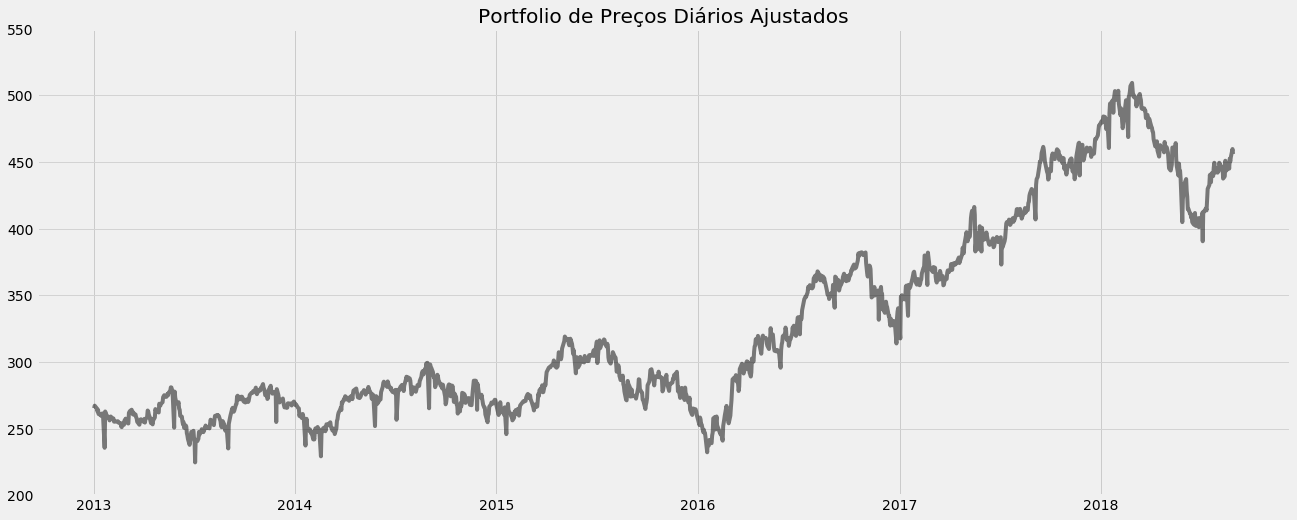

In [63]:
# Tracando uma primeira visualizacao do portfolio
np.warnings.filterwarnings("ignore")

# Fig prepare
fig = plt.figure(figsize=(20, 8))
plt.ylim(200, 550)

plt.rc('axes', axisbelow=True)
ax = plt.subplot(111)

#ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray')
plt.title("Portfolio de Preços Diários Ajustados")
#plt.axis(['2013-01-01','2018-12-31', 0.0, 1.0], bin=100)

plt.plot(port, 'k-', alpha=0.5);

Como o gráfico nos mostra a série de preços do portfólio não é estacionária. E os modelos estatísticos foram desenvolvidos e testados para uso com séries estacionárias. 

- A seguir, traçamos a média móvel de 21 períodos (MM21) do portfólio.

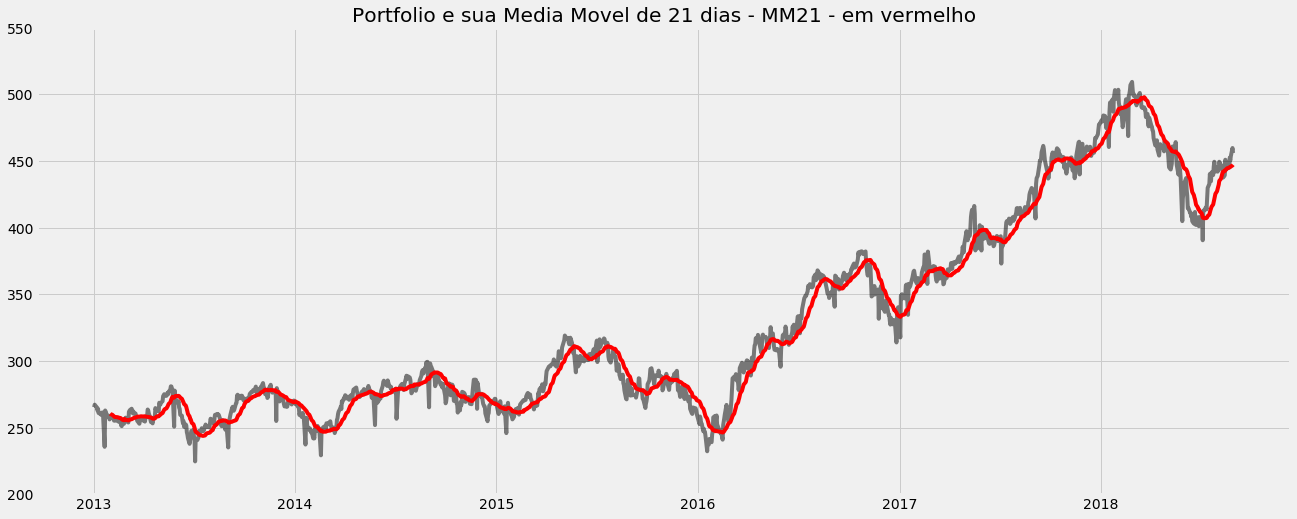

In [64]:
# Tracando a MM de 21 períodos (30 dias corridos)
fig = plt.figure(figsize=(20, 8))
r = port.rolling(window = 21)
plt.ylim(200, 550)
plt.plot(port, '-k', alpha = 0.50)
plt.title("Portfolio e sua Media Movel de 21 dias - MM21 - em vermelho")
plt.plot(r.mean(), '-r');
plt.show();

- A seguir, procedemos a um "alisamento" da série por meio de logaritmação dos preços do portfolio e calculamos a variação (retornos) dos valores, tornando a série tipicamente estacionária.

In [65]:
# Ajustando a estacionariedade da série com log
port_ret = np.log10(port).diff().dropna()

## Trabalhando com a variação dos valores (retornos) do portfolio, no tempo.¶

- a série de variação de preços costuma ser estacionária. Seja $x_t$ esta variação. Então: <br>
$x_t$ = log($p_t$) - log($p_{t-1}$)<br>
= log$(\frac{p_t}{p_{t-1}})$

- as observações ocorrem diariamente, nos dias úteis. O ano útil tem duração média de 252 dias. 

- O aspecto da série de retornos é o seguinte:

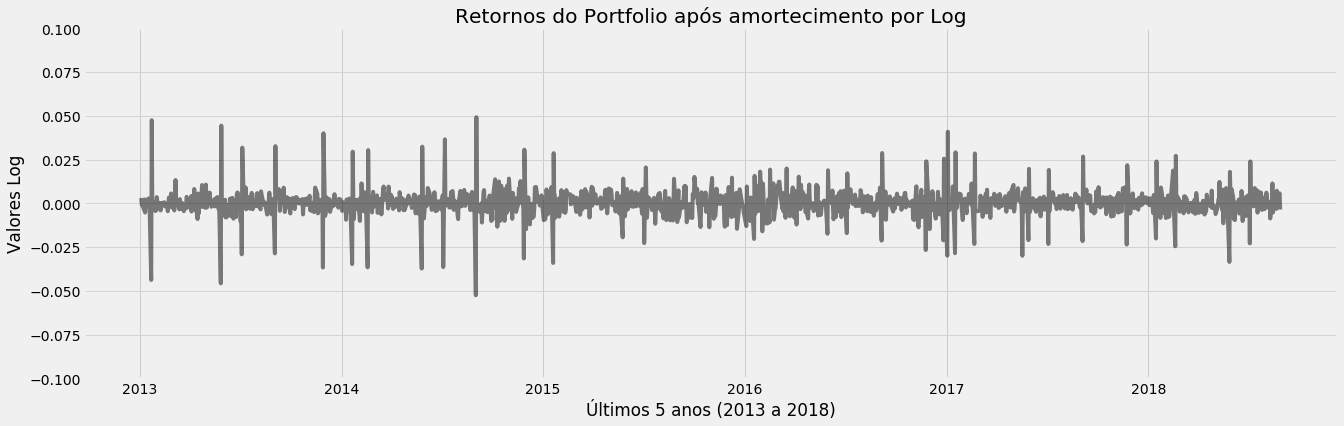

In [66]:
# Primera plotagem após ajuste por log
# plt.plot(port_ret, '-k', alpha=0.5);

# Fig prepare
fig = plt.figure(figsize=(20, 6))
axis = fig.add_subplot(111)
plt.ylim(-0.1, 0.1)

plt.rc('axes', axisbelow=True)
ax = plt.subplot(111)
ylabel = 'Valores Log'
xlabel = 'Últimos 5 anos (2013 a 2018)'
plt.xlabel(xlabel, fontdict=None, labelpad=None)
plt.ylabel(ylabel, fontdict=None, labelpad=None)

#ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray')
plt.title("Retornos do Portfolio após amortecimento por Log")
#plt.axis(['2013-01-01','2018-12-31', 0.0, 1.0], bin=100)

plt.plot(port_ret, '-k', alpha=0.50);

A série de retornos (gráfico logo acima) é tipicamente estacionária.

## Voltando com os preços $p_t$ originais

log$(\frac{p_t}{p_{t-1}})$ ==> $p_t = p_{t-1} exp(x_t)$

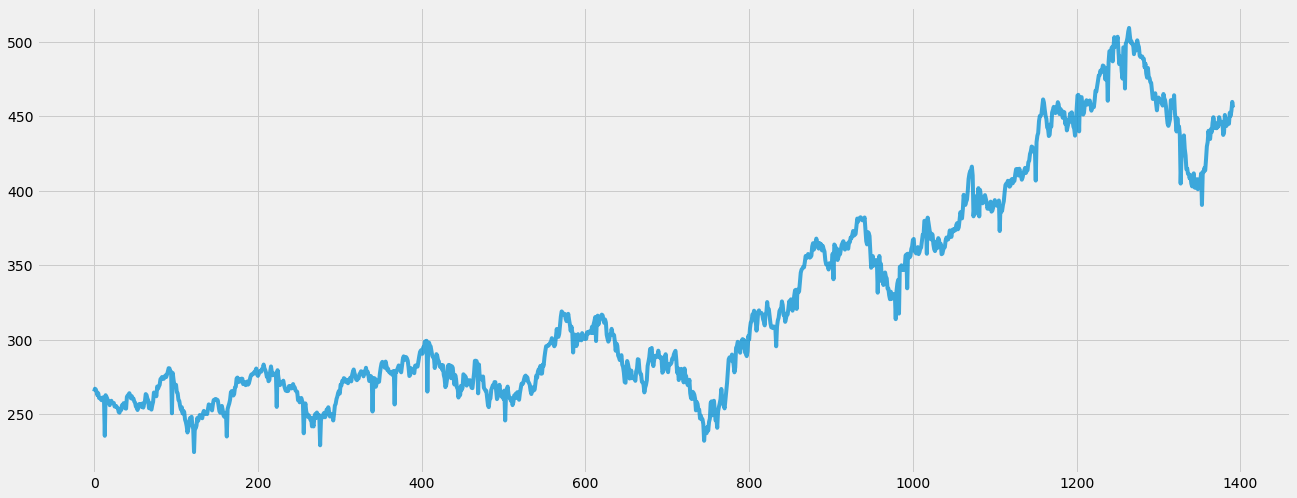

In [67]:
port1 = np.cumprod(np.r_[port.values[0], np.power(10, port_ret.values.reshape(len(port_ret)))]) # produto acumulado e exp "element wize"

# Fig prepare
fig = plt.figure(figsize=(20, 8))
axis = fig.add_subplot(111)
plt.plot(port1, alpha=0.75)

## A distribuição dos retornos $x_t$ deve ser próxima à da distribuição normal (gaussiana)
- histograma de $x_t$:

<Figure size 1440x576 with 0 Axes>

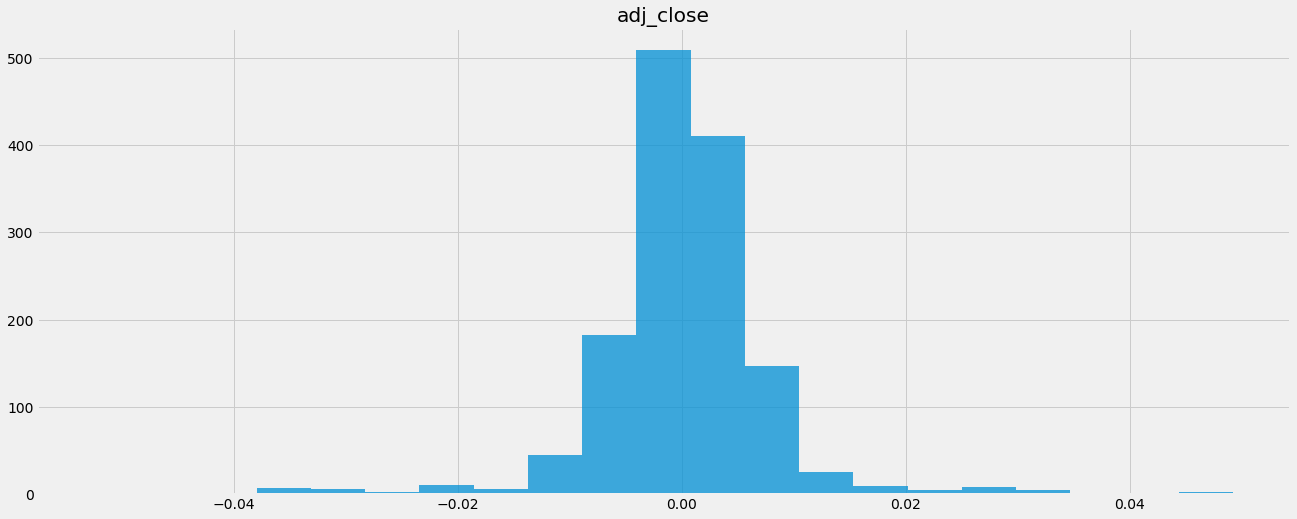

In [68]:
# Fig prepare
fig = plt.figure(figsize=(20, 8))
rcParams['figure.figsize'] = 20, 8
g = port_ret.hist(bins=21, alpha=0.75)

## A seguir, observa-se o comportamento do desvio padrão dos retornos e a média móvel de 21 períodos (MM21).

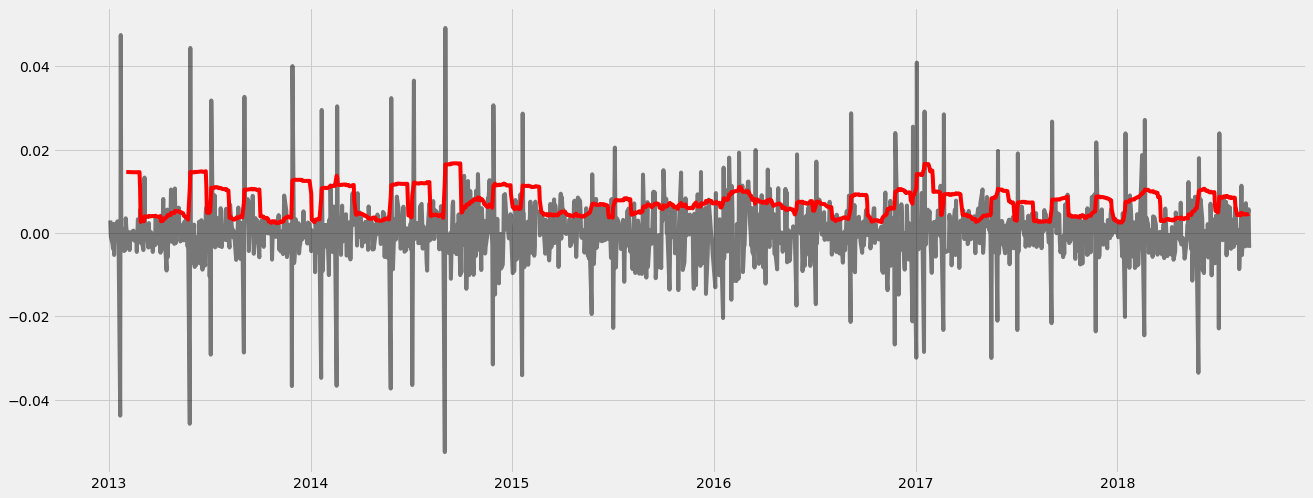

In [69]:
r = port_ret.rolling(window = 21)
rcParams['figure.figsize'] = 20, 8
plt.plot(port_ret, '-k', alpha = 0.50)
plt.plot(r.std(), '-r');

- a MM21 de $x_t$ varia pouco. A variação é próxima de zero.
- o desvio padrão de $x_t$ apresenta oscilações, ou seja, possui uma dinâmica que vale à pena ser melhor observada.

## Tentativa de explicar $x_t$ (série de retornos)

- vamos usar o passado de $x_t$ e tentar explicar seu futuro. <br>
Portanto, seja $x_t = \mu + \phi_{1}x_{t-1} + e_t$ <br>
Esta expressão descreve um **processo autorregressivo**. É como se fizéssemos uma regressão de $x_t$, sobre o passado de $x_t$ ($x_{t-1}, x_{t-2}, ... x_{t-j}$), onde j é o período da média móvel usada. 

O modelo deve tentar reproduzir as propriedades estatísticas da série de preços do portfólio. Para isto usamos a biblioteca **statsmodels**.

**Stastmodels** suporta, dentre outros, os seguintes tipos de modelos:
- Modelos de regressão linear (Linear regression models);
- Modelos lineares generalizados (Generalized linear models);
- Modelos de efeitos discretos (Discrete choice models);
- Modelos lineares robustos (Robust linear models);
- Funções diversas para análises de séries temporais (models and functions for time series);
- Estimadores não paramétricos (nonparametric estimators);
- Uma coleção de datasets de exemplos (collection of of datasets for examples);
- Grande número de testes estatísticos (statistical tests);
- Ferramentas para produção de tabelas em diversos formatos(Tools for Text, LaTex, HTML, Stata into NumPy and Pandas formats);
- Funções de plotagem (plotting functions); e
- Extenso conjunto de testes unitários para garantir resultados corretos (unit tests).

Obs.: para maiores informações, ver biblioteca [statsmodels](http://statsmodels.sourceforge.net/), para Python.

Usaremos, inicialmente, um modelo autorregressivo para tentar explicar o comportamento da série de retornos do portfólio. Este modelo terá como base os modelos ARIMA (AutoRegressive Integrated Moving Average Model) mas usará, apenas, a "porção" autorregressiva.

A seguir, é apresentado o código Python que implementa o modelo ARMA em sua parte autorregressiva, aplicando-o à série de retornos do portfólio. O objetivo é o de obter coeficientes $\mu$, $\phi$ e $e_t$ adequados para serem usados na equação linear apresentada anteriormente.

In [70]:
import statsmodels.tsa as tsa
import statsmodels.api as sm
from pandas import tseries as ts

np.warnings.filterwarnings("ignore")

model=sm.tsa.ARMA(port_ret.values, (1,0)).fit(trend = 'c')

#model = sm.tsa.ARMA(port_ret.as_matrix(), (1,0)).fit(trend = 'c')
print(model.summary());

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1391
Model:                     ARMA(1, 0)   Log Likelihood                4816.855
Method:                       css-mle   S.D. of innovations              0.008
Date:                Tue, 06 Jul 2021   AIC                          -9627.710
Time:                        00:30:35   BIC                          -9611.996
Sample:                             0   HQIC                         -9621.834
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.087      0.277      -0.000       0.000
ar.L1.y       -0.3065      0.026    -12.012      0.000      -0.356      -0.256
                                    Roots           

## Simulando os retornos $x_t$ com os coeficientes obtidos pelo modelo ARMA

- exibindo os parâmetros (coeficientes) obtidos no modelo ARMA

In [71]:
m = model.params
print(m);

[ 1.69191116e-04 -3.06457849e-01]


- plotando os retornos, real e simulado ($x_t$)

In [72]:
port_ar_proc = tsa.arima_process.ArmaProcess(np.r_[1, -model.params], [1])
port_ar_sim = port_ar_proc.generate_sample(len(port_ret))*model.resid.std()

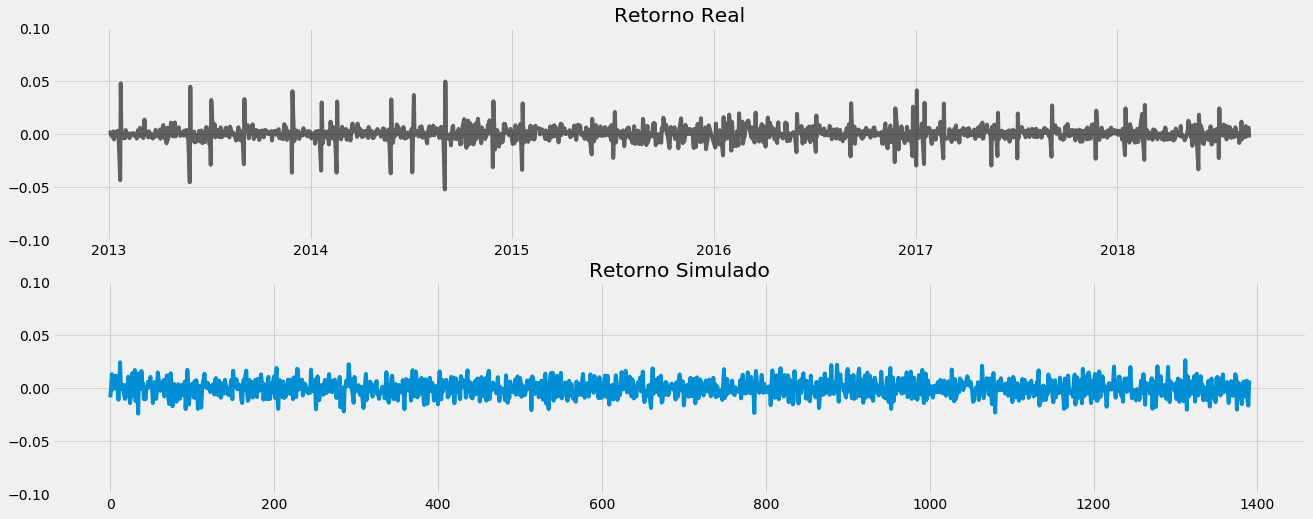

In [73]:
# Fig prepare
fig = plt.figure(figsize=(20, 8))
plt.rc('axes', axisbelow=True)
ax = plt.subplot(211)

#ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray')
plt.title("Retorno Real")
plt.ylim(-0.1, 0.1)
# plt.axis([1, 1000, -0.1, 0.1])
plt.plot(port_ret, 'k', alpha = 0.6)

ax = plt.subplot(212)
plt.title("Retorno Simulado")
plt.ylim(-0.1, 0.1)
# plt.axis([1, 1000, -0.1, 0.1])

#ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray')
plt.plot(port_ar_sim)

plt.show();

## Recuperando a série original $p_t$, a partir da simulação

In [74]:
port1 = np.cumprod(np.r_[port.values[1], np.power(10, port_ar_sim)]) # produto acumulado e 10^p "element wize"

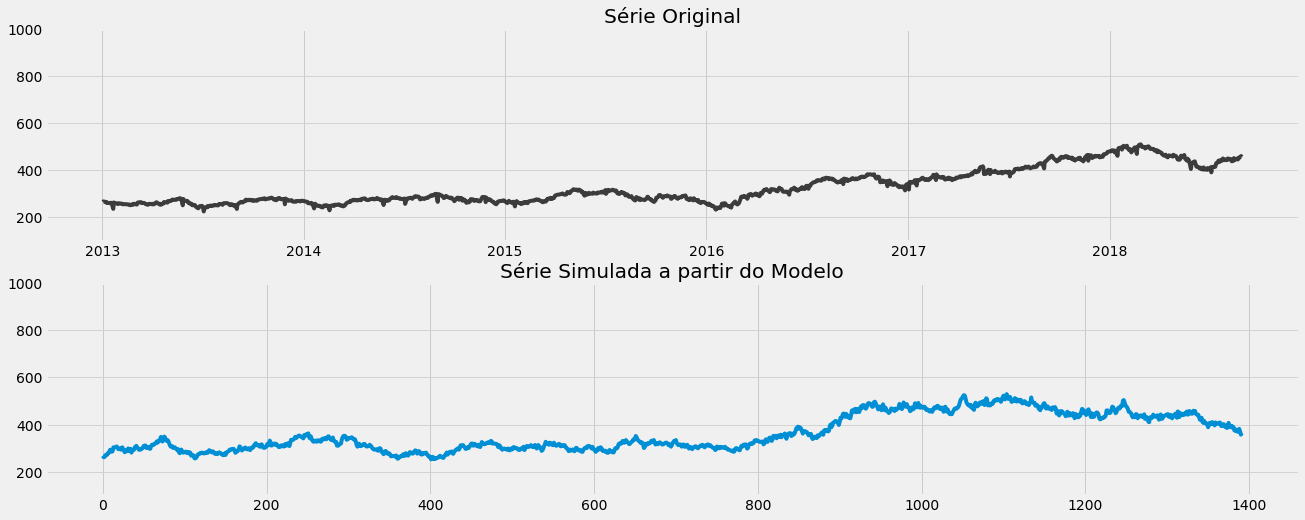

In [75]:
# Fig prepare
fig = plt.figure(figsize=(20, 8))
plt.rc('axes', axisbelow=True)
ax = plt.subplot(211)

#ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray')
plt.title("Série Original")
plt.ylim(100, 1000)
plt.plot(port, 'k', alpha = 0.75)

ax = plt.subplot(212)
plt.ylim(100, 1000)
#plt.xlim(150, 1250)
#plt.axis([150, 1200, 100, 700])
plt.title("Série Simulada a partir do Modelo")
#ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray')
plt.plot(port1)

plt.show();

## Olhando os resíduos do modelo

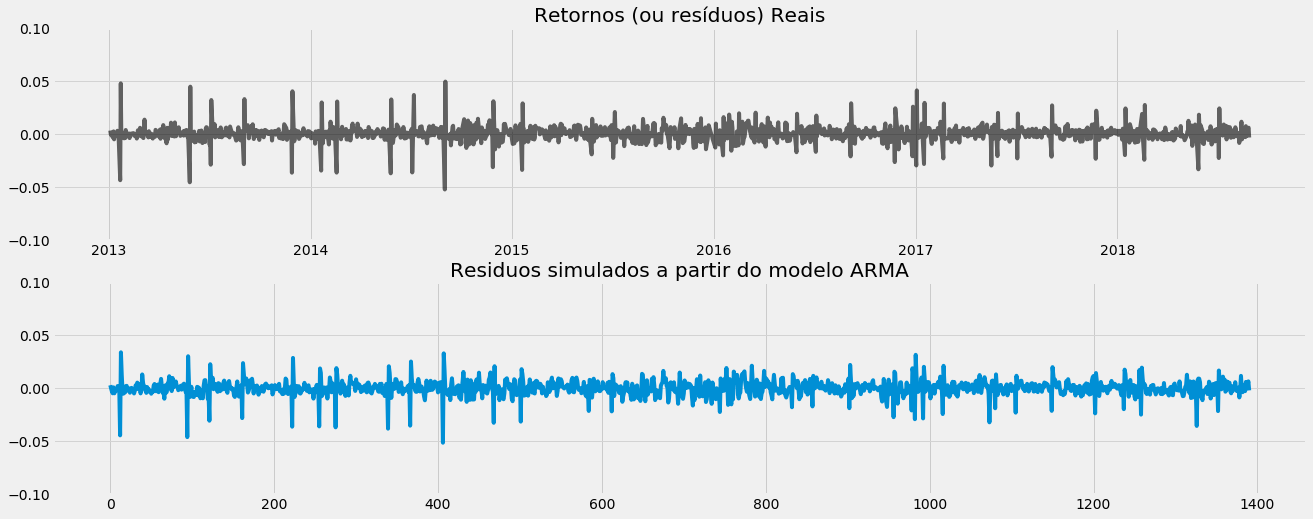

In [76]:
# Fig prepare
fig = plt.figure(figsize=(20, 8))
plt.rc('axes', axisbelow=True)
ax = plt.subplot(211)

#ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray')
plt.title("Retornos (ou resíduos) Reais")
plt.ylim(-0.1, 0.1)
# plt.axis([1, 1000, -0.1, 0.1])
plt.plot(port_ret, 'k', alpha = 0.6)

ax = plt.subplot(212)
plt.title("Residuos simulados a partir do modelo ARMA")
plt.ylim(-0.1, 0.1)
# plt.axis([1, 1000, -0.1, 0.1])

#ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray')
plt.plot(model.resid)

plt.show();

- notar que os resíduos são quase idênticos, o que sugere que toda a informação comportamental persistiu nos resíduos. Isto indica que o modelo não funcionou bem como estimador, pois quase nenhuma informação foi, de fato, retida nos coeficientes obtidos.

## Vamos usar algo diferente

Lá no início observamos que o desvio padrão dos retornos possuía uma certa dinâmica. Vamos usar um modelo que possa descrever esta dinâmica do desvio padrão. Os modelos da família GARCH podem fazer isto. 

Usaremos a biblioteca [ARCH](https://arch.readthedocs.io/en/latest/) Toolbox, que dá suporte às seguintes funcionalidades:

- Modelos univariados de volatilidade (Univariate volatility models);
- Modelos baseados em Bootstrapping;
- Procedimentos de múltipla comparação (multiple comparison procedures); e
- Testes de raízes unitárias (unit root tests). 


$x_t = \mu + e_t$ <br>
<br>
onde, <br>
<br>
$e_t = z_t\sigma_t$ <br>
${\sigma_t}^2 = \omega + \alpha_1{e_{t-1}}^2 + \beta_1{\sigma_{t-1}}^2$

$z_t$   **~**  $N(O,1)$

- Disponibilizando a biblioteca:

In [77]:
import arch
from arch import arch_model

In [78]:
# O modelo envolve elevar ao quadrado valores muito pequenos. Multiplicaremos os valores da serie de retornos que será
# usada por 100, para diminuirmos a chance de divergência do modelo.

am = arch_model(port_ret*100, p=1, q=1)
res = am.fit(disp='off')
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              adj_close   R-squared:                      -0.004
Mean Model:             Constant Mean   Adj. R-squared:                 -0.004
Vol Model:                      GARCH   Log-Likelihood:               -1506.99
Distribution:                  Normal   AIC:                           3021.98
Method:            Maximum Likelihood   BIC:                           3042.93
                                        No. Observations:                 1391
Date:                Tue, Jul 06 2021   Df Residuals:                     1387
Time:                        00:30:36   Df Model:                            4
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0343  2.064e-02     -1.663  9.623e-02 

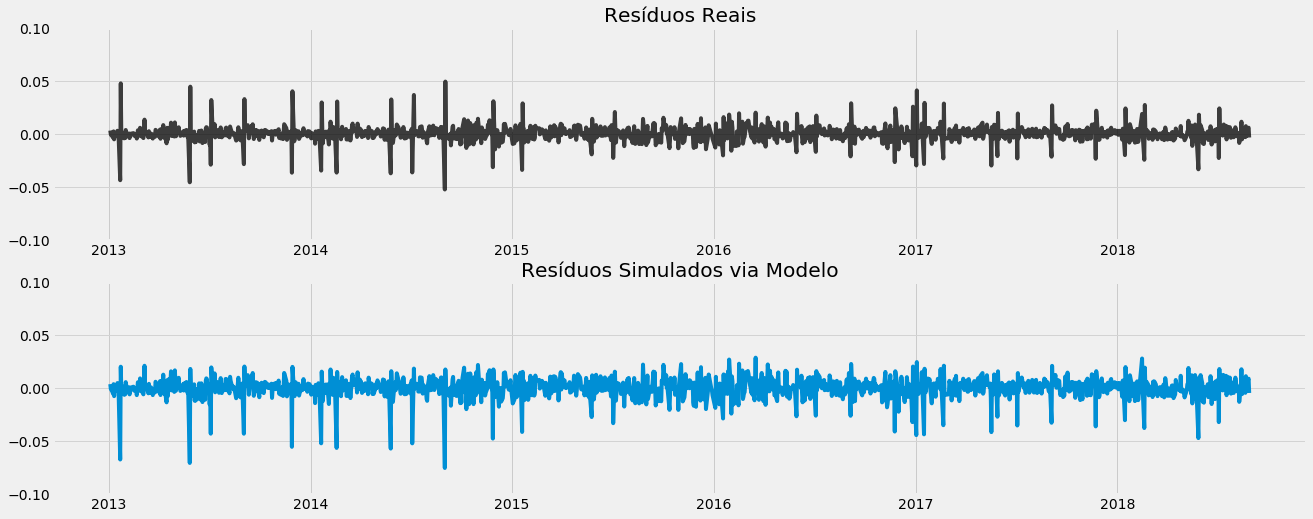

In [79]:
# Fig prepare
fig = plt.figure(figsize=(20, 8))
plt.rc('axes', axisbelow=True)
ax = plt.subplot(211)

#ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray')
plt.title("Resíduos Reais")
plt.ylim(-0.1, 0.1)
# plt.axis([0, 1000, -0.1, 0.1])
plt.plot(port_ret, 'k', alpha = 0.75)

ax = plt.subplot(212)
plt.title("Resíduos Simulados via Modelo")
plt.ylim(-0.1, 0.1)
# plt.axis([0, 1000, -0.1, 0.1])
#ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray')
plt.plot((res.resid/(res.conditional_volatility*100)))

plt.show();

Obs,: notar que valores muito grandes, ou muito pequenos, podem influir na convergência do modelo. Os retornos geralmente são pequenos (na ordem de grandeza) e as vezes uma multiplicação (por 100 ou 1000) visa a torná-los mais significativos diminuindo, desta forma, as chances do modelo divergir. Porém, antes da plotagem, os valores são restaurados aos valores originais.

Como os modelos GARCH não fornecem uma função pronta para fazermos predições (simulações preditivas), construiremos uma a seguir:

In [80]:
# Função para simulação 
def simulate_garch(params, nobs, var=0):
    e = np.random.randn(nobs)
    var = np.zeros(len(e)) + var
    x = np.zeros(len(e))
    corr = 0.10100
    for t in range(len(e)):
        var[t] = params[1] + params[2] * x[t-1] ** 2 + params[3] * var[t-1]
        x[t] = params[0] + e[t] * np.sqrt(var[t])
        
    return x+corr

- A seguir, são exibidos os parâmetros (coeficiente) obtidos a partir do modelo ARCH usado.

In [81]:
# Visualizando os parâmetros gerados pelo modelo
res.params

mu         -3.433191e-02
omega       4.156584e-01
alpha[1]    2.721131e-01
beta[1]     5.072158e-12
Name: params, dtype: float64

In [82]:
port_am_sim = simulate_garch(res.params, len(port_ret))

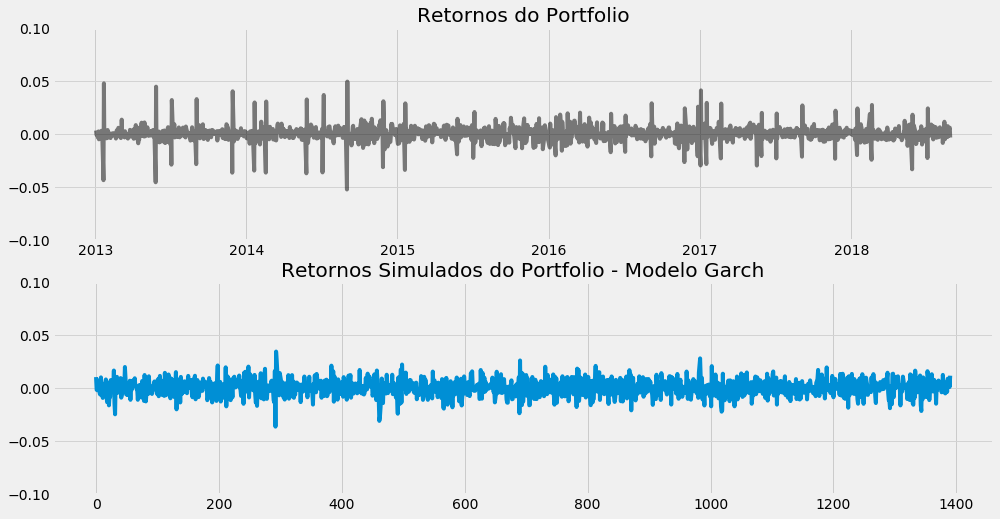

In [83]:
# Fig prepare
fig = plt.figure(figsize=(15, 8))
plt.rc('axes', axisbelow=True)
ax = plt.subplot(211)

#ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray')
plt.ylim(-0.1, 0.1)
plt.title("Retornos do Portfolio")
# plt.axis([0, 1000, -0.1, 0.1])
plt.plot(port_ret, 'k', alpha = 0.5)

ax = plt.subplot(212)
# plt.axis([0, 1000, -0.1, 0.1])
plt.ylim(-0.1, 0.1)
plt.title("Retornos Simulados do Portfolio - Modelo Garch")
#ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray')
plt.plot(port_am_sim/100)

plt.show();

## Recuperando a série original $p_t$

In [84]:
# Valores foram restaurados ao original, redividindo-os por 100, antes de simulá-los
port1 = np.cumprod(np.r_[port.values[1], np.exp(port_am_sim/100)]) # produto acumulado e exp "element wize"

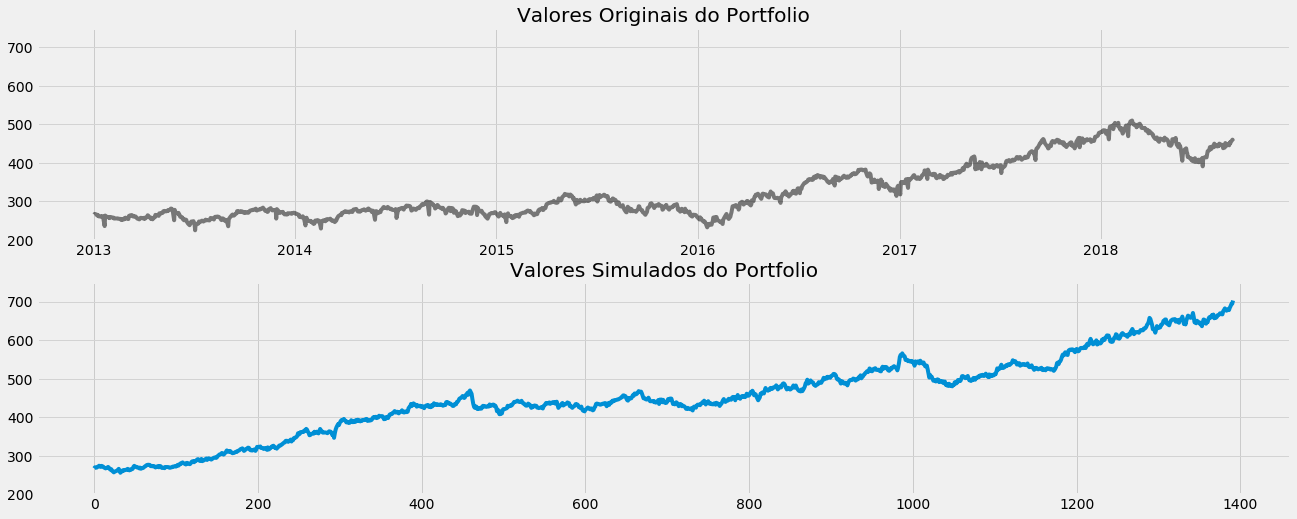

In [85]:
# Fig prepare
fig = plt.figure(figsize=(20, 8))
plt.rc('axes', axisbelow=True)
ax = plt.subplot(211)

#ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray')
plt.title("Valores Originais do Portfolio")
plt.ylim(200, 750)
# plt.axis([0, 1000, 2, 5])
plt.plot(port, 'k', alpha = 0.5)

ax = plt.subplot(212)
plt.title("Valores Simulados do Portfolio")
plt.ylim(200, 750)
ax.yaxis.grid(color='lightgray')
plt.plot(port1)

plt.show();

## Olhando os resíduos baseados no modelo ARCH usado.

- os resíduos ainda são menos parecidos, o que indica espaço para melhorarmos o modelo. Porém diferenças podem ser notadas pois, parte da informação comportamental foi transferida para os coeficientes obtidos. 

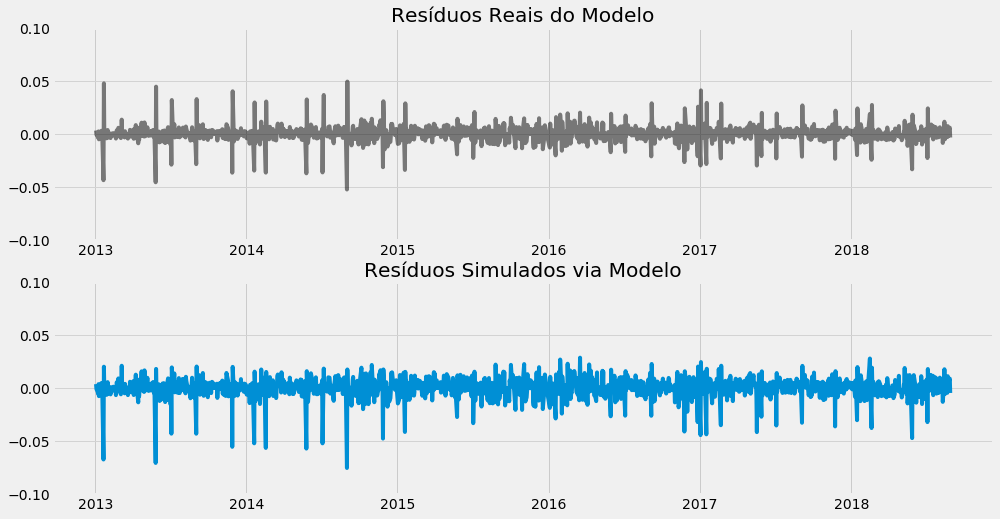

In [86]:
# Fig prepare
fig = plt.figure(figsize=(15, 8))
plt.rc('axes', axisbelow=True)
ax = plt.subplot(211)

#ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray')
plt.title("Resíduos Reais do Modelo")
plt.ylim(-0.1, 0.1)
# plt.axis([0, 1000, -0.1, 0.1])
plt.plot(port_ret, 'k', alpha = 0.5)

ax = plt.subplot(212)
plt.title("Resíduos Simulados via Modelo")
plt.ylim(-0.1, 0.1)
# plt.axis([0, 1000, -0.1, 0.1])
#ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.yaxis.grid(color='lightgray')
plt.plot((res.resid/res.conditional_volatility)/100)

plt.show();

## Predições

Foram efetuadas 100 estimativas para os próximos 21 dias úteis, demostrando a média esperada em vermelho e o cone de volatilidade possível, em verde.

In [87]:
# preparando a serie para tomarmos seus últimos 252 dias (um ano útil)
# e preparando para traçar o gráfico das predições
port2 = port.copy()
port2 = port2.reset_index()
port2.head()

,datetime,adj_close
0,2013-01-02,265.36
1,2013-01-03,267.23
2,2013-01-04,266.72
3,2013-01-07,265.13
4,2013-01-08,262.84


In [88]:
# eliminando a data do índice e deixando apenas a série de valores ajustados do portfolio
port2.drop('datetime', axis=1, inplace=True)

In [89]:
port2.head()

,adj_close
0,265.36
1,267.23
2,266.72
3,265.13
4,262.84


In [90]:
len(port2)

1392

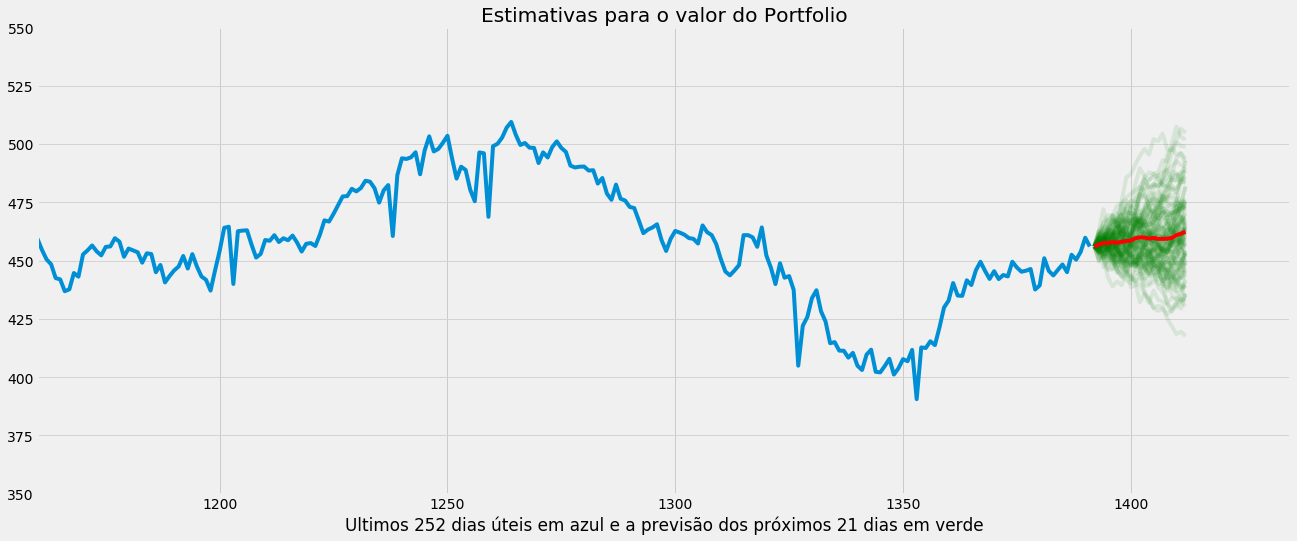

In [91]:
# Preparacao da figura
fig = plt.figure(figsize=(20, 8))
plt.rc('axes', axisbelow=True)
ax = plt.subplot(111)
ax.yaxis.grid(color='lightgray')

plt.title("Estimativas para o valor do Portfolio")
plt.xlabel('Ultimos 252 dias úteis em azul e a previsão dos próximos 21 dias em verde')

plt.ylim(350, 550)
plt.axis([1160, 1435, 350, 550])

plt.plot(port2.tail(252))

paths = np.zeros((100,21))
lim = len(port2)

for i in range(100):
    port_am_sim = simulate_garch(res.params, 20)/100              ## restaurando os valores simulados dividindo por 100 
    path = np.cumprod(np.r_[port.values[-1], np.exp(port_am_sim)])
    paths[i,:] = path
    plt.plot(range(lim, lim+21), path, 'g', alpha = 0.10)

plt.plot(range(lim, lim+21), np.mean(paths, 0), '-r');


O gráfico preditivo nos traz a mensagem de que o valor do portfólio tende a crescer (tendência de alta) nos próximos 21 dias (linha vermelha),  mas que pode oscilar entre o valor estimado mínimo de R\$415,00 e o máximo de R\$512,00 (cone de volatilidade em verde).

## Conclusão

Vimos aqui um exemplo simples de como realizar a análise de séries temporais usando Python, além da aplicação de conceitos básicos de modelagem. 

O entendimento do comportamento de uma série temporal de portfólio é informação extremamente valiosa para aqueles que dirigem empresas e que necessitem de tomar decisões que envolvam risco. As decisões de antecipação, postergação de aquisições, execução de manutenções, realização de investimentos, renovação de contratos, enfim, quaisquer decisões econômicas que envolvam risco, podem ter qualidade muito melhorada, a partir da análise de séries temporais construídas a partir das variáveis envolvidas.

Espero que esta aplicação prática ajude a melhorarmos o conhecimento e a aplicação da análise de séries temporais pelas empresas de nosso país, tão carente de boas decisões.

Recomendamos a leitura da **PARTE 2** deste estudo, que aborda o **Método da Fronteira Eficiente** na gestão de risco dos portfólios.

### Anexo: demonstração do uso da API do serviço AlphaVantage

Para instalar use **pip install alphaVantage-api** 
e em seguida, para garantir a versão mais atual, **pip install --upgrade alphaVantage-api** 

In [92]:
'''

## Buscando ativos no Alpha_vantage Service e gravando localmente numa pasta
#
# Parametros Default da Interface
#
# api_key: str     = None
# output_size: str = 'compact'
# datatype: str    = 'json'
# export: bool     = False
# export_path: str = '~/av_data'
# output: str      = 'csv'
# clean: bool      = False
# proxy: dict      = {}

import pandas as pd
import time
from alphaVantageAPI.alphavantage import AlphaVantage

#
# A classe AlphaVantage possui os seguintes requisitos:
#
# (1) Cadastro previo no site http://www.alphavantage.co/support/ # A api-key, aqui referida, deve se obtida
#
# (2) ATENCAO: para instalar a biblioteca alphaVantage aqui utilizada, NÃO SIGA O PROCEDIMENTO pip INDICADO NO SITE.
#     SIGA O PROCEDIMENTO ABAIXO:
#          
#     pip install alphaVantage-api
# 
# (3) O objetivo deste notebook é o de, apenas, compartilhar conhecimentos a respeito das habilidades de análise
#     das Séries Temporais, tema extremamente carente de exemplos práticos de implementação, pelo menos, em 
#     língua Portuguesa. A análise de séries temporais é reconhecidamente uma habilidade pouco desenvolvida e 
#     carente de profissionais de Data Science que as saibam modelar e interpretar. 
#
#
# (4) Valores default

api_key = 'SUA_API_KEY'
av = AlphaVantage(
        api_key=api_key,
        output_size='full',
        datatype='pandas',
        export=True,
        export_path='alpha_data\\',
        output='csv',
        clean=True,
        proxy={}
    )

# Aqui serão usados preços ajustados, obtidos com periodicidade diaria (Daily Adjusted). Outras periodicidades estão
# disponíveis via a mesma biblioteca. 
# Não há garantia, entretanto, quanto à qualidade dos dados fornecidos.

#
# portfolio =  ['ABEV3.SA', 'EZTC3.SA', 'GRND3.SA', 'HGTX3.SA', '1PETR3.SA', 'EGIE3.SA',  \
#              'VALE3.SA', 'CIEL3.SA', '1ITUB3.SA', 'ITSA3.SA', 'RADL3.SA', 'PSSA3.SA',  \
#              'WEGE3.SA', 'LREN3.SA', 'MDIA3.SA']
#

#
# O portfolio aqui estudade consiste numa carteira de ações ON de empresas brasileiras, com bons fundamentos.
# Mas poderia ser qualquer outro portfolio de ativos, que possuísse, pelo meno 50 pontos observáveis no tempo.
#
# Ao grupo de ações selecionadas foram incluídas VALE e PETROBRAS, pela magnitude do volume burstátil 
# historicamente movimentado por elas.
#
# Não há, neste estudo, qualquer sugestão ou recomendação de aquisição ou alienação de qualquer dos ativos 
# mencionados.
#
# Para a AlphaVantage PETR3 = PBR e ITUB3 = ITUB
#

carteira =  ['ABEV3.SA', 'EZTC3.SA', 'GRND3.SA', 'HGTX3.SA', 'PBR', 'EGIE3.SA',  \
             'VALE3.SA', 'CIEL3.SA', 'ITUB', 'ITSA3.SA', 'RADL3.SA', 'PSSA3.SA',  \
             'WEGE3.SA', 'LREN3.SA', 'MDIA3.SA']

for nome in carteira:
    pd = av.data(symbol=nome, function='DA') 
    print("Proc.: ", nome)
    time.sleep(7) 
print()
print('OK!')

''';

### Siga na Parte 2 deste estudo

Esta simulação retrata um caso real de uma carteira de ações da B3 (Bovespa). Espero que aproveitem a conclusão na Parte 2 deste notebook. É só seguir o link no próprio repositório de nome ***ANALISE DE PORTFOLIO com séries temporais pelo método EF e Python - PARTE 2***.

Desde já fico à disposição,

**Antonio Roberto Mendes Barberá**

**(+55)21992992949**

Leblon, Rio de Janeiro - Brasil